# Bias and Variance in Machine Learning

In machine learning, the concepts of bias and variance are critical for understanding the performance of predictive models. When developing a model, it is important to strike a balance between bias (underfitting) and variance (overfitting) to achieve a model that generalizes well to unseen data. 

## Definitions

- **Bias**: The error introduced by approximating a real-world problem with a simplified model. High bias usually leads to underfitting.
  
- **Variance**: The error introduced due to the model's sensitivity to fluctuations in the training data. High variance usually leads to overfitting.


## Code Explanation

The provided code snippet illustrates the concepts of bias and variance using polynomial regression. 

### Data Generation

The synthetic data $x$ and $y_{\text{true}}$ are generated as:

$$
y_{\text{true}} = 0.5 \cdot x^2 + x + 2 + \text{Random noise}
$$

### Model Training and Testing

Polynomial regression models are fitted for varying degrees: 1, 2, 3, and 4. For each degree, the training and test errors are computed using MSE.

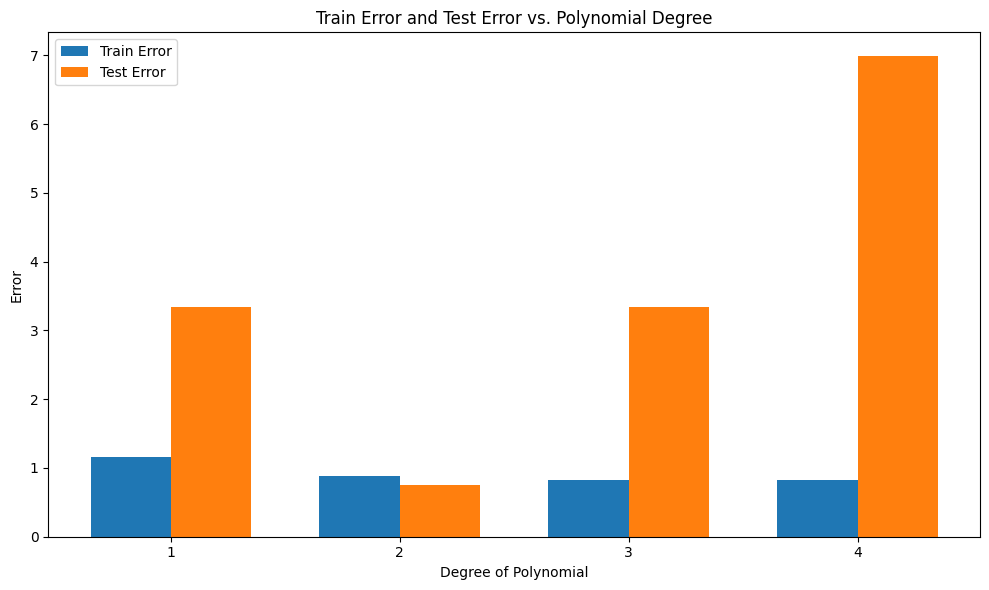

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1, 1)
y_true = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# Fit polynomial regression models with different degrees
degrees = [1, 2, 3, 4]
train_errors = []
test_errors = []

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    # Split data into training and testing sets
    split = int(0.8 * len(X))
    X_train, y_train = X_poly[:split], y_true[:split]
    X_test, y_test = X_poly[split:], y_true[split:]
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the results
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(degrees))

plt.bar(index, train_errors, bar_width, label='Train Error')
plt.bar(index + bar_width, test_errors, bar_width, label='Test Error')

plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.title('Train Error and Test Error vs. Polynomial Degree')
plt.xticks(index + bar_width / 2, degrees)
plt.legend()

plt.tight_layout()
plt.show()

## Observations and Interpretations

- **High Bias**: When the polynomial degree is low (e.g., 1), the model cannot capture the underlying complexity of the data, resulting in high training and test errors.

- **High Variance**: As the polynomial degree increases (e.g., 3 and 4), the model becomes too flexible and captures noise, leading to low training error but high test error.

- **Bias-Variance Tradeoff**: The model performs optimally when the degree of the polynomial is close to the true underlying function (e.g., degree 2), balancing both bias and variance.


## Conclusion

Understanding the bias-variance tradeoff is crucial for model selection and evaluation. The objective is to find a model that simultaneously minimizes both bias and variance, leading to a low generalization error.